# <font color='red'>APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO Parte 2</font>

## <font color='DarkRed'>**Visualização e pré-processamento de dados**

<font color='OrangeRed'>**Os dados foram extraídos do site do Kaggle:**
    
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data    

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cancer_tratado.csv',sep=';', encoding='utf-8')

In [4]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
df.shape

(569, 31)

In [267]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### <font color='OrangeRed'>**Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**
    
<font color='MidnightBlue'> **Pode ser feita de duas formas diferentes:**

<font color='DarkGreen'> **df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')**
    
<font color='DarkGreen'> **df['diagnosis'].replace({'M':1, 'B': 0}, inplace=True)**    

<font color='MidnightBlue'>**temos que ter em contas que** 
    
<font color='MidnightBlue'> **onde M = maligno = 1,  B = benigno = 0**   

In [6]:
# Fazemos uma copia do dataFrame original da forma:
df2 = pd.DataFrame.copy(df)

In [7]:
df2['diagnosis'].replace({'M':1, 'B': 0}, inplace=True)

<font color='MidnightBlue'>**Vamos dar uma olhada no número de casos Benigno e Maligno do conjunto de dados. A partir da saída mostrada abaixo, a maioria dos casos são benignos (0).**

In [8]:
print(df2.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [9]:
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df2.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<font color='MidnightBlue'> **Em seguida, visualizamos os dados usando gráficos de densidade para ter uma noção da distribuição dos dados. Nas saídas abaixo, você pode ver que os dados mostram uma distribuição gaussiana geral**

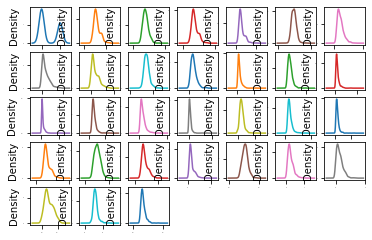

In [11]:
df2.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

<font color='MidnightBlue'> **É bom verificar as correlações entre os atributos. No gráfico de saída abaixo, o vermelho ao redor da diagonal sugere que os atributos estão correlacionados entre si. As manchas amarelas e verdes sugerem alguma correlação moderada e as caixas azuis mostram correlações negativas.**

In [12]:
from matplotlib import cm as cm

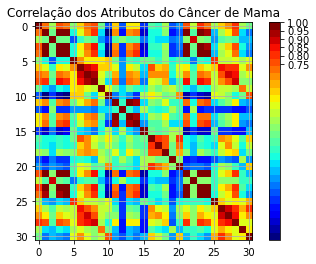

In [13]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df2.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Correlação dos Atributos do Câncer de Mama')
# Adicione barra de cores, certifique-se de especificar os
# locais de marcação para corresponder aos marcadores de marcação desejados
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

## <font color='DarkRed'>**ATRIBUTOS PREVISORES E ALVO**

In [14]:
df2.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
# identificamos os atributos previsores
previsores = df2.iloc[:, 1:32].values

In [16]:
previsores

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
previsores.shape

(569, 30)

In [18]:
# a variavel alvo é chamada tambem variavel target ou 'HeartDisease' neste caso
alvo = df2.iloc[:, 0].values

In [19]:
alvo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [20]:
alvo.shape

(569,)

### <font color='OrangeRed'>**Análise das escalas dos atributos (Escalonamento)**

In [21]:
df2.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### <font color='OrangeRed'>**Podemos utilizar dois métodos ou técnicas**

<font color='MidnightBlue'> **Padronização (utiliza a média e o desvio padrão como referência).**

<font color='MidnightBlue'> **Normalização (utiliza os valores máximo e mínimo como referência).**

In [22]:
#neste caso vamos a usar a Padronização 
from sklearn.preprocessing import StandardScaler

In [23]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [24]:
previsores_esc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [25]:
# Transformamos valores numéricos da variável previsores_esc em um dataframe
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [26]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,5.073075e-16,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


## <font color='DarkRed'>**Codificação de variáveis categóricas**

### <font color='OrangeRed'>**LabelEncoder**</font> <font color='MidnightBlue'> **transformação de variáveis categóricas em numéricas automaticamante usando LabelEncoder**

 - ### <font color='MidnightBlue'> **Anteriormente foi manualmente**

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# Fazemos uma copia do dataFrame original da forma:
df3 = pd.DataFrame.copy(df)

In [29]:
df3.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [30]:
# Vamos transforma a primeira coluna com indice '0' .reshape(-1,1) 
df3['diagnosis'] = LabelEncoder().fit_transform(df3['diagnosis'])

In [31]:
df3.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## <font color='DarkRed'>**RESUMO PRÉ-PROCESSAMENTO**

<font color='OrangeRed'>**alvo =**</font> <font color='MidnightBlue'> **variável que se pretende atingir (Prever se o câncer é benigno ou maligno).**

<font color='OrangeRed'>**previsores =**</font> <font color='MidnightBlue'> **conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.**

<font color='OrangeRed'>**previsores_esc =**</font> <font color='MidnightBlue'> **conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.**

# <font color='DarkRed'>**BASE DE TREINO E TESTE**

<font color='OrangeRed'>**Parâmetros train_test_split:**

- <font color='OrangeRed'>**arrays:**</font> <font color='MidnightBlue'>**nomes dos atributos previsores e alvo.**
- <font color='OrangeRed'>**test_size:**</font> <font color='MidnightBlue'>**tamanho em porcentagem dos dados de teste. default é none.**
- <font color='OrangeRed'>**train_size:**</font> <font color='MidnightBlue'>**tamanho em porcentagem dos dados de treinamento.default é none.**
- <font color='OrangeRed'>**random_state:**</font> <font color='MidnightBlue'>**nomeação de um estado aleatório.**
- <font color='OrangeRed'>**shuffle:**</font> <font color='MidnightBlue'>**embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.**
- <font color='OrangeRed'>**stratify:**</font> <font color='MidnightBlue'>**Possibilidade de dividir os dados de forma estratificada. Default é None  (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).**

In [32]:
from sklearn.model_selection import train_test_split

### <font color='OrangeRed'>**Dica**

<font color='MidnightBlue'>**Por fim, dividiremos os dados em variáveis de previsão e variáveis alvo, dividindo-as em conjuntos de treinamento e teste. Usaremos 30% dos dados como conjunto de teste.**
    
<font color='DarkGreen'>**As variáveis "x_treino" e "x_teste" correspondem às variáveis previsoras, já as variáveis "y_treino" e "y_teste" corresponde à variável alvo**

In [242]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state =21)

In [243]:
x_treino.shape

(398, 30)

In [244]:
x_teste.shape

(171, 30)

In [245]:
y_treino.shape

(398,)

In [246]:
y_teste.shape

(171,)

### <font color='OrangeRed'>**Observação**

<font color='MidnightBlue'>**A partir do conjunto de dados, analisaremos e construiremos um modelo para prever se um determinado conjunto de sintomas leva ao câncer de mama. Este é um problema de classificação binária, e alguns algoritmos são apropriados para uso. Como não sabemos qual deles terá o melhor desempenho no momento, faremos um teste com algoritmos apropriados com configuração padrão para obter uma indicação antecipada de como cada um deles funciona. Usaremos validação cruzada para cada teste**
    
### <font color='OrangeRed'>**Serão utilizados os seguintes algoritmos de aprendizado supervisionado: Classificação**   
    
- <font color='Indigo'>**Gaussian Naive Bayes (NB)**  
- <font color='Indigo'>**Máquinas de Vetor de Suporte Linear (SVM)**
- <font color='Indigo'>**Regressão Logística**
- <font color='Indigo'>**KNN é a sigla de K Nearest Neighbors (K vizinhos mais próximos)** 
- <font color='Indigo'>**Árvores de Decisão** 
- <font color='Indigo'>**Random Forests**    
- <font color='Indigo'>**XGBoost (eXtreme Gradient Boosting)**    
- <font color='Indigo'>**LightGBM (Light Gradient Boosting Machine)**
- <font color='Indigo'>**CatBoost (Category Boosting) (aumento de
gradiente) que por sua vez é uma evolução do Random Forest.**         

## <font color='DarkRed'>**GAUSSIAN NAIVE BAYES**
    
https://scikit-learn.org/stable/modules/naive_bayes.html    

<font color='OrangeRed'>**Treinamento do algoritmo**

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
# GaussianNB implementa o algoritmo Gaussian Naive Bayes para classificação.
# A probabilidade dos recursos é assumida como gaussiana:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

<font color='OrangeRed'>**Avaliação do algoritmo com teste**

In [132]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [133]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

<font color='MidnightBlue'>**Verificamos o quanto ele acertou, para isso importamos apartir da biblioteca sklearn.metrics as bibliotecas accuracy_score, confusion_matrix, classification_report**

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
accuracy_score(y_teste, previsoes_naive)

0.9473684210526315

In [136]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 94.74%


<font color='OrangeRed'>**Matriz de Confusão:**

In [137]:
Matriz_confusao = confusion_matrix(y_teste, previsoes_naive)
Matriz_confusao 

array([[103,   4],
       [  5,  59]])

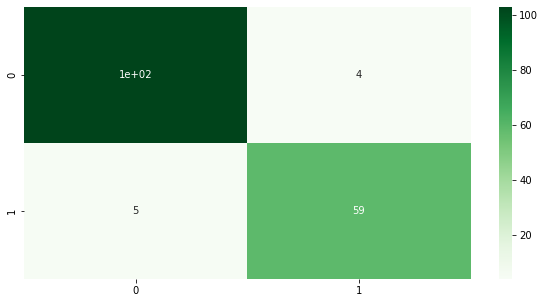

In [141]:
plt.figure(figsize=(10,5))
sns.heatmap(Matriz_confusao, annot=True,cmap='Greens');

In [261]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



<font color='OrangeRed'>**Notas de métricas de avaliação**

<font color='DarkGreen'>**Acurácia:**</font> <font color='MidnightBlue'>**indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;**
    
<font color='DarkGreen'>**Precisão:**</font> <font color='MidnightBlue'>**dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas (aqui buscamos os falsos positivos);**
    
<font color='DarkGreen'>**Recall/Revocação/Sensibilidade:**</font> <font color='MidnightBlue'>**dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas (aqui buscamos os falsos negativos);**
    
<font color='DarkGreen'>**F1-Score:**</font> <font color='MidnightBlue'>**média harmônica entre precisão e recall (uma maneira de observar em um único número a precisão e o recall).**

<font color='OrangeRed'>**Análise dados de treino**

In [262]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [263]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 93.97%


In [264]:
confusion_matrix(y_treino, previsoes_treino)

array([[241,   9],
       [ 15, 133]])

<font color='MidnightBlue'>**com previsoes Acurácia teste: 92.40% e Acurácia treino: 94.22%**

<font color='MidnightBlue'>**com previsoes_esc Acurácia teste: 94.74% e Acurácia treino: 93.97%%**   

### <font color='OrangeRed'>**Validação Cruzada**

In [265]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [266]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [267]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
resultado

array([0.89473684, 0.89473684, 1.        , 0.94736842, 1.        ,
       0.94736842, 0.94736842, 1.        , 0.94736842, 1.        ,
       1.        , 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       1.        , 0.84210526, 0.89473684, 1.        , 0.94736842,
       0.89473684, 0.78947368, 0.89473684, 1.        , 0.94736842,
       1.        , 0.94736842, 0.94736842, 0.89473684, 0.77777778])

In [268]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.82%


## <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**

## <font color='DarkRed'>**MÁQUINAS DE VETORES DE SUPORTE (SVM)**
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### <font color='OrangeRed'>**Ajuste do algoritmo - Ajuste do SVM**
    
<font color='MidnightBlue'>**Vamos nos concentrar no SVM para o ajuste do algoritmo. Podemos ajustar dois parâmetros-chave do algoritmo SVM - o valor de C e o tipo de kernel. O padrão C para SVM é 1.0 e o kernel é Radial Basis Function (RBF). Usaremos o método de pesquisa em grade usando validação cruzada com uma cópia padronizada do conjunto de dados de treinamento de amostra. Vamos tentar uma combinação de valores C e os seguintes tipos de kernel 'linear', 'poly', 'rbf' e 'sigmoid**

In [38]:
from sklearn.svm import SVC

In [39]:
#svm = SVC(kernel='linear', random_state=1, C = 2) 
#svm = SVC(kernel='poly', random_state=1, C = 2) 
#svm = SVC(kernel='sigmoid', random_state=1, C = 2) 
#svm = SVC(kernel='precomputed', random_state=1, C = 2) no funciona
svm = SVC(kernel='rbf', random_state=5, C = 2) #melhor para resultados e menor tempo computacional
svm.fit(x_treino, y_treino)

SVC(C=2, random_state=5)

In [40]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [41]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

Acurácia: 98.25%


In [44]:
confusion_matrix(y_teste, previsoes_svm)

array([[106,   1],
       [  2,  62]])

In [45]:
# Dando uma olhada nos pontos classificados incorretamente para SVC
cfm = confusion_matrix(y_teste, previsoes_svm)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

Confusion Matrix: 
 [[106   1]
 [  2  62]] 

True Negative: 106
False Positive: 1
False Negative: 2
True Positive: 62


In [46]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



<font color='OrangeRed'>**Análise dados de treino**

In [47]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [48]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino)* 100.0))

Acurácia: 98.74%


In [49]:
confusion_matrix(y_treino, previsoes_treino)

array([[250,   0],
       [  5, 143]])

### <font color='OrangeRed'>**Validação Cruzada**

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [52]:
# Criando o modelo Ojo demora en executar
modelo = SVC(kernel='rbf', random_state=1, C = 2) 
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

In [53]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 97.88%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
<font color='DarkGreen'>**Observe a melhoria drástica do SVM após o uso de dados escalonados (Padronizado)**    

## <font color='DarkRed'>**REGRESSÃO LOGÍSTICA**
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [54]:
from sklearn.linear_model import LogisticRegression

In [105]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [106]:
logistica.intercept_

array([-0.1196075])

In [107]:
logistica.coef_

array([[ 0.35624576,  0.18995408,  0.34643466,  0.46552366,  0.03920905,
        -0.38957787,  0.85859252,  0.84465922, -0.16392157,  0.00845141,
         1.30249271,  0.168698  ,  0.86802525,  1.0234616 , -0.25678515,
        -0.72789963, -0.18268702, -0.01862866, -0.04063224, -0.58661165,
         0.99273783,  0.92956037,  0.83693425,  1.00774835,  1.04825135,
        -0.14139265,  0.82998533,  0.6891756 ,  0.50236883,  0.65089407]])

In [108]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 97.66%


In [111]:
confusion_matrix(y_teste, previsoes_logistica)

array([[107,   0],
       [  4,  60]])

In [112]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### <font color='OrangeRed'>**Análise dados de treino**

In [113]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [114]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino)* 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 98.99%


In [142]:
cfm = confusion_matrix(y_treino, previsoes_treino)
#cfm = confusion_matrix(y_teste, previsoes_svm)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

Confusion Matrix: 
 [[250   0]
 [  4 144]] 

True Negative: 250
False Positive: 0
False Negative: 4
True Positive: 144


## <font color='OrangeRed'>**Validação Cruzada**

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [117]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [119]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 98.06%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**    

## <font color='DarkRed'>**APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)**
    
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html    

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=7, p=1)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

In [206]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [207]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [209]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 95.91%


In [210]:
cfm = confusion_matrix(y_teste, previsoes_knn)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

Confusion Matrix: 
 [[106   1]
 [  6  58]] 

True Negative: 106
False Positive: 1
False Negative: 6
True Positive: 58


In [211]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### <font color='OrangeRed'>**Análise dados de treino**

In [212]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [213]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 96.98%


In [214]:
confusion_matrix(y_treino, previsoes_treino)

array([[248,   2],
       [ 10, 138]])

## <font color='OrangeRed'>**Validação Cruzada**

In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [217]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

In [218]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.65%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**
    
### <font color='DarkGreen'>**KNN =  95.91% - 164 acertos e 96.65% (validação cruzada) : previsores_esc- KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)**    

## <font color='DarkRed'>**ÁRVORE DE DECISÃO**
    
https://scikit-learn.org/stable/modules/tree.html    

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [274]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 5, max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)

In [275]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [276]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [278]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 95.91%


In [279]:
cfm = confusion_matrix(y_teste, previsoes_arvore)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

Confusion Matrix: 
 [[106   1]
 [  6  58]] 

True Negative: 106
False Positive: 1
False Negative: 6
True Positive: 58


In [280]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### <font color='OrangeRed'>**Análise dados de treino**

In [287]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [288]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 97.24%


In [289]:
confusion_matrix(y_treino, previsoes_treino)

array([[250,   0],
       [ 11, 137]])

## <font color='OrangeRed'>**Validação Cruzada**

In [284]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [285]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [286]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.67%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**
    
### <font color='DarkGreen'>**KNN =  95.91% - 164 acertos e 96.65% (validação cruzada) : previsores_esc- KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)**  
    
### <font color='DarkGreen'>**Árvore de decisão = 95.91% e 97.24% (treino e teste) - 164 acertos e 93.67% (validação cruzada): previsores_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)**    

## <font color='DarkRed'>**RANDOM FOREST**
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    

In [319]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [321]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [322]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [323]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [324]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 96.49%


In [325]:
cfm = confusion_matrix(y_teste, previsoes_random)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

Confusion Matrix: 
 [[105   2]
 [  4  60]] 

True Negative: 105
False Positive: 2
False Negative: 4
True Positive: 60


In [326]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### <font color='OrangeRed'>**Análise dados de treino**

In [327]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [328]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino)* 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 99.25%


In [329]:
confusion_matrix(y_treino, previsoes_treino)

array([[250,   0],
       [  3, 145]])

## <font color='OrangeRed'>**Validação Cruzada**

In [330]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [331]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [332]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 5, max_depth=4)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.11%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**
    
### <font color='DarkGreen'>**KNN =  95.91% - 164 acertos e 96.65% (validação cruzada) : previsores_esc- KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)**  
    
### <font color='DarkGreen'>**Árvore de decisão = 95.91% e 97.24% (treino e teste) - 164 acertos e 93.67% (validação cruzada): previsores_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)**
    
### <font color='DarkGreen'>**Random Forest = 96.49% - 165 acertos e 96.11%(validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 5, max_depth=4)**    

## <font color='DarkRed'>**XGBOOST**

https://xgboost.readthedocs.io/en/stable/    

In [38]:
from xgboost import XGBClassifier

In [153]:
xg = XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=250, objective='binary:logistic', random_state=21)
xg.fit(x_treino,y_treino)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=21,
              reg_alpha=0, reg_lambda=1, ...)

In [154]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [156]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))
accuracy_score(y_teste, previsoes_xg) 

Acurácia: 96.49%


0.9649122807017544

In [157]:
confusion_matrix(y_teste, previsoes_xg)

array([[105,   2],
       [  4,  60]])

In [158]:
print(classification_report(y_teste, previsoes_xg))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### <font color='OrangeRed'>**Análise dados de treino**

In [159]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [160]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 99.75%


In [161]:
confusion_matrix(y_treino, previsoes_treino)

array([[250,   0],
       [  1, 147]])

## <font color='OrangeRed'>**Validação Cruzada**

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [163]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [164]:
# Criando o modelo
modelo = XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=250, objective='binary:logistic', 
                       random_state=21)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.12%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**
    
### <font color='DarkGreen'>**KNN =  95.91% - 164 acertos e 96.65% (validação cruzada) : previsores_esc- KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)**  
    
### <font color='DarkGreen'>**Árvore de decisão = 95.91% e 97.24% (treino e teste) - 164 acertos e 93.67% (validação cruzada): previsores_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)**
    
### <font color='DarkGreen'>**Random Forest = 96.49% - 165 acertos e 96.11%(validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 5, max_depth=4)** 
    
### <font color='DarkGreen'>**XGboost = 96.49% - 165 acertos e 96.12% (validação cruzada) : previsores ou previsores_esc - XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=250, objective='binary:logistic', random_state=21)**    

## <font color='DarkRed'>**LIGHTGBM**
    
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html    

In [165]:
import lightgbm as lgb 

In [247]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

In [248]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária     
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [249]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

[LightGBM] [Info] Number of positive: 148, number of negative: 250
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371859 -> initscore=-0.524249
[LightGBM] [Info] Start training from score -0.524249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [250]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

[LightGBM] [Info] Number of positive: 148, number of negative: 250
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371859 -> initscore=-0.524249
[LightGBM] [Info] Start training from score -0.524249


datetime.timedelta(microseconds=63956)

In [251]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

array([0.0113753 , 0.19034723, 0.92460501, 0.97492311, 0.99441133,
       0.00836171, 0.02448725, 0.00941435, 0.038526  , 0.10600617,
       0.01236637, 0.00507081, 0.15888996, 0.00586638, 0.01401159,
       0.41745671, 0.01601027, 0.01204693, 0.00979099, 0.03127629,
       0.01033518, 0.99030478, 0.00658853, 0.99409082, 0.88125856,
       0.01869156, 0.00566197, 0.03119018, 0.99004385, 0.12328787,
       0.01690127, 0.22803022, 0.00785349, 0.01121766, 0.99259658,
       0.0084724 , 0.403748  , 0.94848649, 0.30986143, 0.99208035,
       0.00900018, 0.98019945, 0.00582392, 0.01232672, 0.00727039,
       0.28922083, 0.02642084, 0.01876589, 0.0169943 , 0.01179286,
       0.0064396 , 0.0072166 , 0.0057354 , 0.31749162, 0.00924501,
       0.99500613, 0.97374422, 0.96365356, 0.98967334, 0.05986279,
       0.01950993, 0.66328092, 0.00586638, 0.98873661, 0.91179574,
       0.97436463, 0.01884742, 0.02050472, 0.95213629, 0.00988181,
       0.99277334, 0.99004385, 0.88313381, 0.61063373, 0.89632

In [252]:
previsoes_lgbm.shape

(171,)

In [253]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 171):
    if previsoes_lgbm[i] >= .5:       
       previsoes_lgbm[i] = 1
    else:  
       previsoes_lgbm[i] = 0

In [254]:
previsoes_lgbm

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0.])

In [255]:
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [256]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [257]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

Acurácia: 96.49%


In [258]:
confusion_matrix(y_teste, previsoes_lgbm)

array([[106,   1],
       [  5,  59]])

### <font color='OrangeRed'>**Análise dados de treino**

In [259]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

array([0.00513317, 0.98032186, 0.99362343, 0.06178705, 0.02344829,
       0.02412908, 0.00609693, 0.97021111, 0.01552168, 0.65456503,
       0.98985624, 0.84957406, 0.01446519, 0.05213102, 0.00783058,
       0.01302646, 0.01867808, 0.88039353, 0.10064124, 0.02625821,
       0.99315122, 0.79146442, 0.00995121, 0.01064301, 0.01117201,
       0.03049028, 0.01505581, 0.25027146, 0.00972445, 0.02081649,
       0.02936341, 0.02746258, 0.70350381, 0.0307839 , 0.01753218,
       0.17240692, 0.01250336, 0.00481239, 0.97846371, 0.91898829,
       0.00885784, 0.04137005, 0.8622461 , 0.12965135, 0.99500613,
       0.01923616, 0.02160828, 0.97961029, 0.02695167, 0.01436966,
       0.99078029, 0.02137816, 0.01757383, 0.99016705, 0.00895839,
       0.01046876, 0.03641577, 0.99259658, 0.7785187 , 0.009668  ,
       0.15536474, 0.10338058, 0.98762291, 0.99359125, 0.97145086,
       0.9508285 , 0.971091  , 0.00915614, 0.07887524, 0.03641577,
       0.0083811 , 0.04626746, 0.04004243, 0.0152276 , 0.00768

In [260]:
previsoes_treino.shape

(398,)

In [261]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 398):
    if previsoes_treino[i] >= .5:       
       previsoes_treino[i] = 1
    else:  
       previsoes_treino[i] = 0

In [262]:
previsoes_treino

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1.

In [263]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 99.50%


In [264]:
confusion_matrix(y_treino, previsoes_treino)

array([[250,   0],
       [  2, 146]])

## <font color='OrangeRed'>**Validação Cruzada**

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [240]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [265]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',     
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.12%


### <font color='DarkGreen'>**Naive Bayes = 94.74% (treino e teste) - 162 acertos e 93.82% (validação cruzada) - previsores**
    
### <font color='Chocolate'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**  
    
### <font color='DarkGreen'>**Regressão logística = 97.66%, - 167 acertos e 98.06% (validação cruzada): previsores_esc - LogisticRegression(random_state=1, max_iter=500, penalty="l2", tol=0.0001, C=1,solver="lbfgs")**
    
### <font color='DarkGreen'>**KNN =  95.91% - 164 acertos e 96.65% (validação cruzada) : previsores_esc- KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)**  
    
### <font color='DarkGreen'>**Árvore de decisão = 95.91% e 97.24% (treino e teste) - 164 acertos e 93.67% (validação cruzada): previsores_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)**
    
### <font color='DarkGreen'>**Random Forest = 96.49% - 165 acertos e 96.11%(validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 5, max_depth=4)** 
    
### <font color='DarkGreen'>**XGboost = 96.49% - 165 acertos e 96.12% (validação cruzada) : previsores ou previsores_esc - XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=250, objective='binary:logistic', random_state=21)**  
    
### <font color='DarkGreen'>**LightGBM =  96.49% (treino e teste)- 165 acertos e 96.12% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary', max_depth = 2, learning_rate = .05, max_bin =100)**

### <font color='Tomato'>**o melhor algoritmo de classificação na análise do tumor do dataset sobre câncer de mama é:**

### <font color='DarkGreen'>**SVM = 98.25% - 168 acertos e 97.88% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=5, C =2)**

https://www.w3schools.com/colors/colors_hex.asp